In [1]:
import pandas as pd

In [15]:
sheets = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =['CustomerDemographic','CustomerAddress','NewCustomerList','Transactions'])

In [16]:
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df_CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic')
df_CustomerAddress=pd.read_excel(xls, 'CustomerAddress')
df_NewCustomerList =pd.read_excel(xls, 'NewCustomerList')
df_Transactions = pd.read_excel(xls, 'Transactions')

In [17]:
df_Transactions = df_Transactions.dropna(subset = ['product_line'])

In [46]:
df_CustomerDemographic['gender']=df_CustomerDemographic['gender'].replace('F','Female')
df_CustomerDemographic['gender']=df_CustomerDemographic['gender'].replace('Femal','Female')
df_CustomerDemographic['gender']=df_CustomerDemographic['gender'].replace('M','Male')

In [56]:
df_CustomerDemographic['age'] = df_CustomerDemographic['DOB'].apply(lambda x: (2017 - x.year)) 

In [53]:
df_CustomerDemographic['tenure'].unique()

array([11., 16., 15.,  7.,  8., 13., 20.,  9.,  6.,  1., 18., 21., 12.,
       19., 14.,  4., 22.,  5., 17.,  2.,  3., 10., nan])

In [57]:
df_CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,56.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,42.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,16.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,44.0


In [19]:
df_CustomerDemographic.isnull().sum(axis = 0)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [20]:
del df_CustomerDemographic['default']

In [58]:
merged_inner = pd.merge(left=df_CustomerDemographic, right=df_Transactions, left_on='customer_id', right_on='customer_id')


In [59]:
merged_inner.isnull().sum(axis = 0)

customer_id                               0
first_name                                0
last_name                               638
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     438
job_title                              2364
job_industry_category                  3198
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  438
age                                     438
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            358
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                      

In [60]:
merged_inner

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,instance
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,110.56,1
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,751.02,1
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,189.28,1
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,90.10,1
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,198.22,1
19796,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,827.16,1
19797,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,144.26,1
19798,3500,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,15.08,1


In [25]:
product = df_Transactions[['brand','product_line','product_class','product_size','list_price','profit']]
product

,brand,product_line,product_class,product_size,list_price,profit
0,Solex,Standard,medium,medium,71.49,17.87
1,Trek Bicycles,Standard,medium,large,2091.47,1702.55
2,OHM Cycles,Standard,low,medium,1793.43,1544.61
3,Norco Bicycles,Standard,medium,medium,1198.46,817.36
4,Giant Bicycles,Standard,medium,large,1765.30,1055.82
...,...,...,...,...,...,...
19995,OHM Cycles,Standard,high,medium,2005.66,802.26
19996,Solex,Road,medium,medium,416.98,104.24
19997,OHM Cycles,Standard,medium,medium,1636.90,1592.19
19998,OHM Cycles,Standard,high,medium,227.88,91.15


In [26]:
group_names = ['medium', 'high', 'low']

Text(0.5, 1.0, 'Product Class bins')

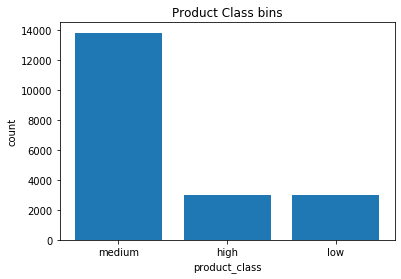

In [27]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, product["product_class"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("product_class")
plt.pyplot.ylabel("count")
plt.pyplot.title("Product Class bins")

Text(0.5, 1.0, 'Price bins')

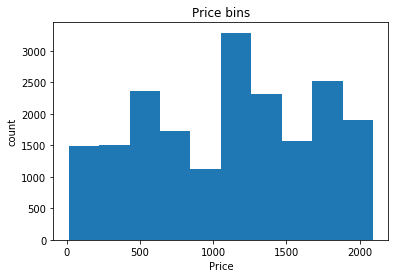

In [28]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(product["list_price"], bins = 10)

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

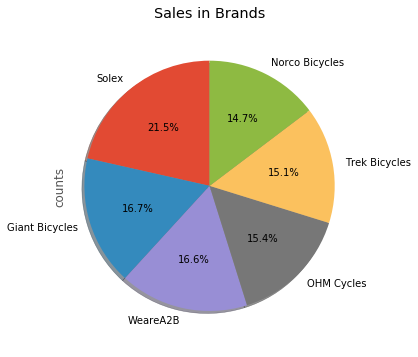

In [29]:
brand = product['brand'].value_counts().rename_axis('brand').reset_index(name='counts')
brand = brand.set_index('brand')

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
brand['counts'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Sales in Brands')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [30]:
df_Transactions.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date    datetime64[ns]
online_order               float64
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
profit                     float64
dtype: object

In [31]:
df_Transactions['instance'] = 1

# set index to time, this makes df a time series df and then you can apply pandas time series functions.
df_Transactions.set_index(df_Transactions['transaction_date'], drop=True, inplace=True)

# create another df by resampling the original df and counting the instance column by Month ('M' is resample by month)
ufo2 = pd.DataFrame(df_Transactions['instance'].resample('M').count())

# just to find month of resampled observation
ufo2['transaction_date'] = pd.to_datetime(ufo2.index.values)

ufo2['month'] = ufo2['transaction_date'].apply(lambda x: x.month)
print(ufo2.groupby(by='month').mean())


       instance
month          
1          1665
2          1612
3          1629
4          1641
5          1666
6          1564
7          1700
8          1735
9          1559
10         1751
11         1648
12         1633


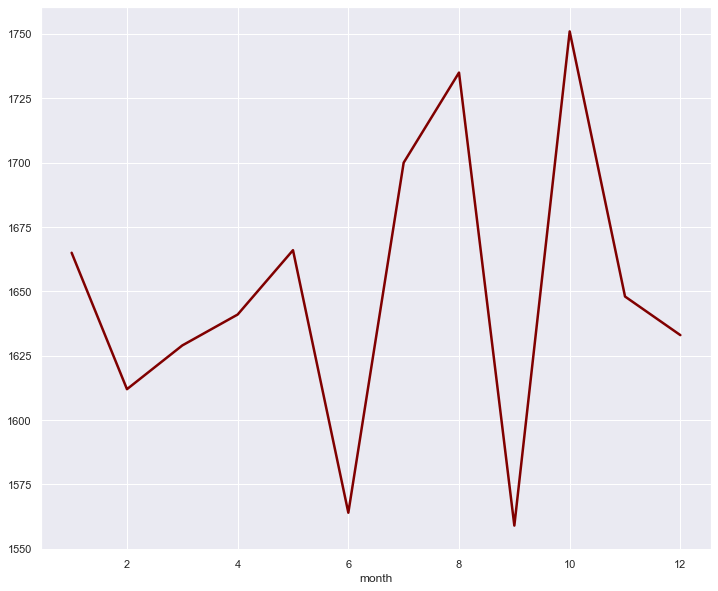

In [123]:
ufo2.set_index('month')['instance'].plot(figsize=(12, 10), linewidth=2.5, color='maroon');




In [33]:
df_Transactions['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

In [ ]:
df_Transactions['product_line'].unique()


In [54]:
df_CustomerDemographic['age'] = df_CustomerDemographic['DOB'].apply(lambda x: (2017 - x.year)) 

In [63]:
df_CustomerDemographic = df_CustomerDemographic.dropna(subset = ['age'])

In [66]:
df_CustomerDemographic.isnull().sum(axis = 0)

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

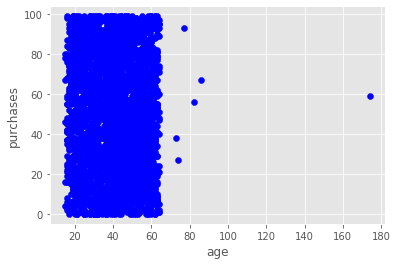

In [69]:
plt.scatter(df_CustomerDemographic.age, df_CustomerDemographic.past_3_years_bike_related_purchases,  color='blue')
plt.xlabel("age")
plt.ylabel("purchases")
plt.show()

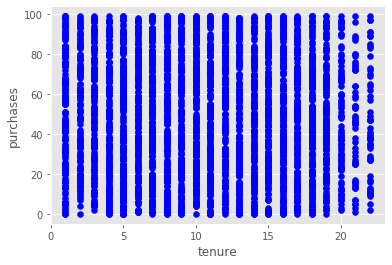

In [70]:
plt.scatter(df_CustomerDemographic.tenure, df_CustomerDemographic.past_3_years_bike_related_purchases,  color='blue')
plt.xlabel("tenure")
plt.ylabel("purchases")
plt.show()

Text(0.5, 1.0, 'Gender wise sales')

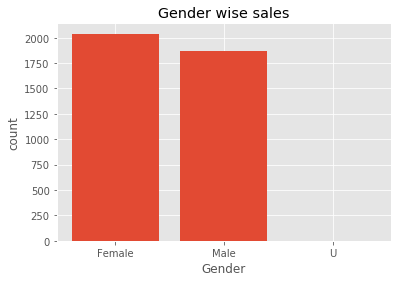

In [225]:
group_names = df_CustomerDemographic['gender'].unique()
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df_CustomerDemographic["gender"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Gender")
plt.pyplot.ylabel("count")
plt.pyplot.title("Gender wise sales")

In [226]:
AX=df_Transactions['brand'].unique()
BX=df_Transactions['product_line'].unique()
CX=df_Transactions['product_class'].unique()
DX=df_Transactions['product_size'].unique()

AX,BX,CX,DX

(array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
        'Giant Bicycles', 'WeareA2B'], dtype=object),
 array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object),
 array(['medium', 'low', 'high'], dtype=object),
 array(['medium', 'large', 'small'], dtype=object))

In [253]:
X = df_Transactions[['brand','product_line','product_class','product_size']].values
X[:5]

array([['Solex', 'Standard', 'medium', 'medium'],
       ['Trek Bicycles', 'Standard', 'medium', 'large'],
       ['OHM Cycles', 'Standard', 'low', 'medium'],
       ['Norco Bicycles', 'Standard', 'medium', 'medium'],
       ['Giant Bicycles', 'Standard', 'medium', 'large']], dtype=object)

In [254]:
Y = df_Transactions['profit'].values
Y[:5]

array([  17.87, 1702.55, 1544.61,  817.36, 1055.82])

In [255]:
from sklearn import preprocessing
Inv = preprocessing.LabelEncoder()
Inv.fit(AX)
X[:,0] =Inv.transform(X[:,0])
X[0:5]

array([[3, 'Standard', 'medium', 'medium'],
       [4, 'Standard', 'medium', 'large'],
       [2, 'Standard', 'low', 'medium'],
       [1, 'Standard', 'medium', 'medium'],
       [0, 'Standard', 'medium', 'large']], dtype=object)

In [256]:
PL = preprocessing.LabelEncoder()
PL.fit(BX)
X[:,1] =PL.transform(X[:,1])
X[0:5]

array([[3, 2, 'medium', 'medium'],
       [4, 2, 'medium', 'large'],
       [2, 2, 'low', 'medium'],
       [1, 2, 'medium', 'medium'],
       [0, 2, 'medium', 'large']], dtype=object)

In [257]:
PC = preprocessing.LabelEncoder()
PC.fit(CX)
X[:,2] =PC.transform(X[:,2])
X[0:5]

array([[3, 2, 2, 'medium'],
       [4, 2, 2, 'large'],
       [2, 2, 1, 'medium'],
       [1, 2, 2, 'medium'],
       [0, 2, 2, 'large']], dtype=object)

In [258]:
PS = preprocessing.LabelEncoder()
PS.fit(DX)
X[:,3] =PS.transform(X[:,3])
X[0:5]

array([[3, 2, 2, 1],
       [4, 2, 2, 0],
       [2, 2, 1, 1],
       [1, 2, 2, 1],
       [0, 2, 2, 0]], dtype=object)

In [259]:
dataset = pd.DataFrame({'Brand': X[:, 0], 'product_line': X[:, 1],'product_class':X[:,2],'product_size' : X[:,3],'profit':Y[:]})


In [260]:
dataset

,Brand,product_line,product_class,product_size,profit
0,3,2,2,1,17.87
1,4,2,2,0,1702.55
2,2,2,1,1,1544.61
3,1,2,2,1,817.36
4,0,2,2,0,1055.82
...,...,...,...,...,...
19798,2,2,0,1,802.26
19799,3,1,2,1,104.24
19800,2,2,2,1,1592.19
19801,2,2,0,1,91.15


In [261]:
import numpy as np
msk = np.random.rand(len(dataset))<0.8
train = dataset[msk]
test = dataset[~msk]

In [262]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['Brand']])
train_y = np.asanyarray(train[['profit']])

test_x = np.asanyarray(test[['Brand']])
test_y = np.asanyarray(test[['profit']])

poly = PolynomialFeatures(degree =3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.],
       [ 1.,  2.,  4.,  8.],
       ...,
       [ 1.,  2.,  4.,  8.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  4., 16., 64.]])

In [263]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[   0.         -133.41533989   73.64202424   -6.49294002]]
Intercept:  [453.005487]


Text(0, 0.5, 'Profit')

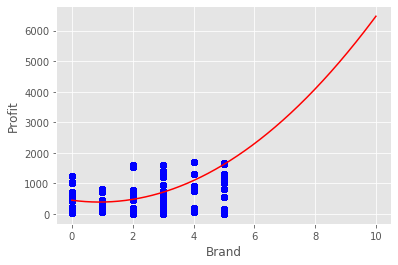

In [267]:
import matplotlib.pyplot as plt
plt.scatter(train.Brand,train.profit,color ='blue')
XX = np.arange(0.0,10.0,0.01)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Brand")
plt.ylabel("Profit")

In [268]:

train_x = np.asanyarray(train[['product_line']])
train_y = np.asanyarray(train[['profit']])

test_x = np.asanyarray(test[['product_line']])
test_y = np.asanyarray(test[['profit']])

poly = PolynomialFeatures(degree =3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1., 2., 4., 8.],
       [1., 2., 4., 8.],
       [1., 2., 4., 8.],
       ...,
       [1., 2., 4., 8.],
       [1., 2., 4., 8.],
       [1., 2., 4., 8.]])

In [222]:
clf1 = linear_model.LinearRegression()
train_y_ = clf1.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf1.coef_)
print ('Intercept: ',clf1.intercept_)

Coefficients:  [[   0.          388.17050104 -186.87378253   56.2490602 ]]
Intercept:  [96.63847262]


Text(0, 0.5, 'Profit')

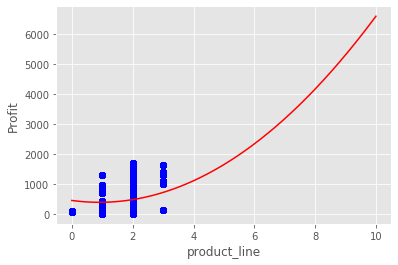

In [223]:
plt.scatter(train.product_line,train.profit,color ='blue')
XX = np.arange(0,10.0,0.01)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r' )
plt.xlabel("product_line")
plt.ylabel("Profit")

In [150]:
df_cust = df_CustomerDemographic.dropna(subset = ['job_title','job_industry_category','wealth_segment'])

In [152]:
df_cust['job_title'].value_counts()

Social Worker                42
Sales Representative         38
Chemical Engineer            37
Dental Hygienist             37
Cost Accountant              36
                             ..
Programmer Analyst IV         2
Accounting Assistant IV       2
Research Assistant III        2
Developer I                   1
Database Administrator II     1
Name: job_title, Length: 195, dtype: int64

In [153]:
df_cust['job_industry_category'].value_counts()

Manufacturing         695
Financial Services    682
Health                543
Retail                305
Property              231
IT                    127
Entertainment         122
Argiculture            99
Telecommunications     61
Name: job_industry_category, dtype: int64

In [154]:
df_cust['wealth_segment'].value_counts()

Mass Customer        1427
High Net Worth        734
Affluent Customer     704
Name: wealth_segment, dtype: int64

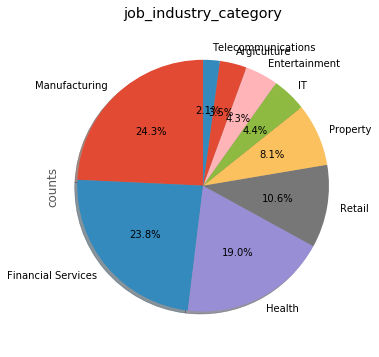

In [158]:
job_industry_category = df_cust['job_industry_category'].value_counts().rename_axis('job_industry_category').reset_index(name='counts')
job_industry_category = job_industry_category.set_index('job_industry_category')


mpl.style.use('ggplot') # optional: for ggplot-like style
job_industry_category['counts'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('job_industry_category')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [160]:
df_CustomerAddress.isnull().sum(axis=0)

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [162]:
conda install -c conda-forge geopy


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packa



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [195]:

loc=[]
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

for index,row in df_CustomerAddress.iterrows():
    for location in df_CustomerAddress['state']:
        loc.append(location)
lon = []
lat = []
n=0
from geopy.exc import GeocoderTimedOut
for location in loc:
    n=n+1
    try:
        ad = geolocator.geocode(location)
        lat.append(ad.latitude)
        lon.append(ad.longitude) 
    except AttributeError as e:
        
        lat.append('null')
        lon.append('null')
        
    except GeocoderTimedOut as e:
        
        lat.append('null')
        lon.append('null')
    

GeocoderUnavailable: Service not available

In [196]:
 len(lat)

2917

In [179]:
conda install -c conda-forge folium


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          87 KB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.1-py_0
  folium             conda-forge/noarch::folium-0.11.0-py_0




folium-0.11.0        | 61 KB     |            |   0% 
folium-0.11.0        | 61 KB     | ##6        |  26% 
folium-0.11.0        | 61 KB     | ########## | 100% 

branca-0.4.1         | 26 KB     |            |   0% 
branca-0.4.1         | 26 KB   

In [200]:
locate = pd.DataFrame({'latitude': lat, 'longitude': lon})
locate['latitude'] = locate['latitude'].astype(float)
locate['longitude'] = locate['longitude'].astype(float)

In [204]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
import folium # map rendering library

# create map of New York using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=18)

# add markers to map
for lat, lng in zip(locate['latitude'], locate['longitude']):
   
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [269]:
merged_inner.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
age                                           float64
transaction_id                                  int64
product_id                                      int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                       

In [281]:
merged_inner['job_title']=merged_inner['job_title'].astype(str)
merged_inner['gender']=merged_inner['gender'].astype(str)
merged_inner['job_industry_category']=merged_inner['job_industry_category'].astype(str)
merged_inner['brand']=merged_inner['brand'].astype(str)



In [282]:
AX = merged_inner['job_title'].unique()
BX = merged_inner['gender'].unique()
CX = merged_inner['job_industry_category'].unique()
AX,BX,CX

(array(['Executive Secretary', 'Administrative Officer',
        'Recruiting Manager', 'nan', 'Senior Editor', 'Media Manager I',
        'Business Systems Development Analyst', 'Senior Quality Engineer',
        'Nuclear Power Engineer', 'Developer I', 'Account Executive',
        'Junior Executive', 'Media Manager IV', 'Sales Associate',
        'Professor', 'Geological Engineer', 'Project Manager',
        'Safety Technician I', 'Research Assistant I',
        'Accounting Assistant III', 'Editor', 'Research Nurse',
        'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
        'Product Engineer', 'Information Systems Manager',
        'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
        'Assistant Media Planner', 'Payment Adjustment Coordinator',
        'Food Chemist', 'Accountant III', 'Director of Sales',
        'Senior Financial Analyst', 'Registered Nurse',
        'Biostatistician II', 'Computer Systems Analyst II',
        'Software T

In [285]:
X = merged_inner[['job_title','gender','job_industry_category','profit']].values
X[:5]

array([['Executive Secretary', 'Female', 'Health', 110.56],
       ['Executive Secretary', 'Female', 'Health', 751.02],
       ['Executive Secretary', 'Female', 'Health', 189.27999999999997],
       ['Executive Secretary', 'Female', 'Health', 90.09999999999997],
       ['Executive Secretary', 'Female', 'Health', 17.869999999999997]],
      dtype=object)

In [287]:
from sklearn import preprocessing
JT = preprocessing.LabelEncoder()
JT.fit(AX)
X[:,0] =JT.transform(X[:,0])
X[0:5]
 

array([[71, 'Female', 'Health', 110.56],
       [71, 'Female', 'Health', 751.02],
       [71, 'Female', 'Health', 189.27999999999997],
       [71, 'Female', 'Health', 90.09999999999997],
       [71, 'Female', 'Health', 17.869999999999997]], dtype=object)

In [288]:
G = preprocessing.LabelEncoder()
G.fit(BX)
X[:,1] =G.transform(X[:,1])
X[0:5]
 

array([[71, 0, 'Health', 110.56],
       [71, 0, 'Health', 751.02],
       [71, 0, 'Health', 189.27999999999997],
       [71, 0, 'Health', 90.09999999999997],
       [71, 0, 'Health', 17.869999999999997]], dtype=object)

In [290]:
JIC = preprocessing.LabelEncoder()
JIC.fit(CX)
X[:,2] =JIC.transform(X[:,2])
X[0:5]
 

array([[71, 0, 3, 110.56],
       [71, 0, 3, 751.02],
       [71, 0, 3, 189.27999999999997],
       [71, 0, 3, 90.09999999999997],
       [71, 0, 3, 17.869999999999997]], dtype=object)

In [291]:
Y = merged_inner[['brand']]

In [304]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4 , random_state = 3)
print(x_train.shape, x_test.shape)

(11880, 4) (7920, 4)


In [305]:
SalesTree = DecisionTreeClassifier(criterion="entropy", max_depth =4)
SalesTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [306]:
SalesTree.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [307]:
predTree = SalesTree.predict(x_test)


In [308]:

print(predTree[:10])
print(y_test[0:10])

['Solex' 'Norco Bicycles' 'Giant Bicycles' 'Giant Bicycles'
 'Norco Bicycles' 'Solex' 'Norco Bicycles' 'WeareA2B' 'Solex'
 'Norco Bicycles']
                brand
14069      OHM Cycles
13449        WeareA2B
16904  Giant Bicycles
547    Giant Bicycles
9895    Trek Bicycles
3262   Giant Bicycles
10433   Trek Bicycles
2505         WeareA2B
828        OHM Cycles
7426   Norco Bicycles


In [309]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.42525252525252527


In [311]:
df_CustomerAddress['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64